In [17]:
import pandas as pd

In [18]:
data = pd.read_pickle("preparedData.pkl")
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In the following, we now try to assess which site in the data set represents the public site and the private site respectively. We start by grouping the sites and examine the total count of sessions that took place on a certain weekday at the respective site and try to assess if there are any significant differences in the data.

In [19]:
sessions_by_weekday = data.groupby(["siteID", "weekday"]).size().reset_index(name="session_count")

In [20]:
print(sessions_by_weekday)

    siteID  weekday  session_count
0        1        0           5445
1        1        1           6087
2        1        2           5912
3        1        3           5893
4        1        4           4253
5        1        5            494
6        1        6            300
7        2        0           4271
8        2        1           4886
9        2        2           4973
10       2        3           4869
11       2        4           4851
12       2        5           2375
13       2        6           1927


In [21]:
# mapping of weekday numbers to weekday names
weekday_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

# transform weekday numbers into weekday names
sessions_by_weekday["weekday"] = sessions_by_weekday["weekday"].map(weekday_mapping)

print(sessions_by_weekday)

    siteID    weekday  session_count
0        1     Monday           5445
1        1    Tuesday           6087
2        1  Wednesday           5912
3        1   Thursday           5893
4        1     Friday           4253
5        1   Saturday            494
6        1     Sunday            300
7        2     Monday           4271
8        2    Tuesday           4886
9        2  Wednesday           4973
10       2   Thursday           4869
11       2     Friday           4851
12       2   Saturday           2375
13       2     Sunday           1927


In [22]:
# calculate the total amount of sessios per siteID
total_sessions_per_site = sessions_by_weekday.groupby("siteID")["session_count"].sum().reset_index(name="total_sessions")
# assign the total amount of charging sessions per siteID to the DataFrame
sessions_by_weekday = pd.merge(sessions_by_weekday, total_sessions_per_site, on="siteID")
print(total_sessions_per_site)

   siteID  total_sessions
0       1           28384
1       2           28152


In [23]:
# add a collumn regarding the relative amount of sessions
sessions_by_weekday["relative_session_count"] = sessions_by_weekday["session_count"] / sessions_by_weekday.groupby("siteID")["session_count"].transform('sum')
print(sessions_by_weekday)

    siteID    weekday  session_count  total_sessions  relative_session_count
0        1     Monday           5445           28384                0.191833
1        1    Tuesday           6087           28384                0.214452
2        1  Wednesday           5912           28384                0.208286
3        1   Thursday           5893           28384                0.207617
4        1     Friday           4253           28384                0.149838
5        1   Saturday            494           28384                0.017404
6        1     Sunday            300           28384                0.010569
7        2     Monday           4271           28152                0.151712
8        2    Tuesday           4886           28152                0.173558
9        2  Wednesday           4973           28152                0.176648
10       2   Thursday           4869           28152                0.172954
11       2     Friday           4851           28152                0.172315

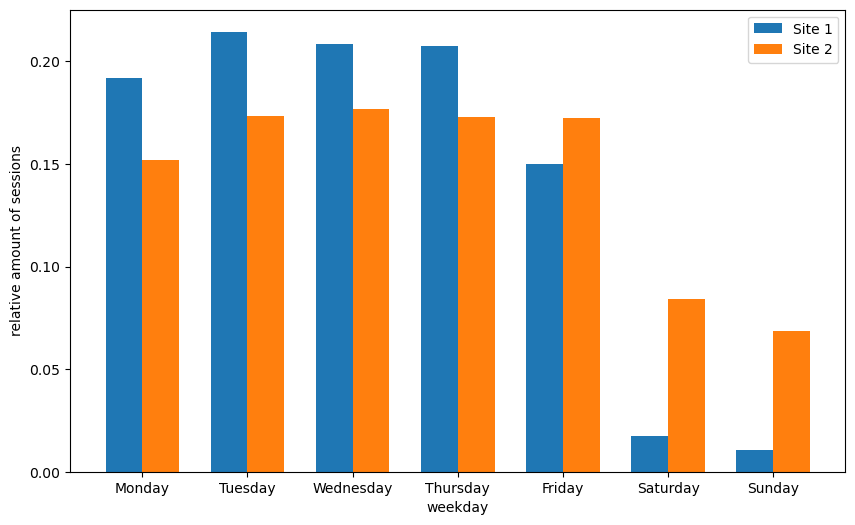

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

site_ids = sessions_by_weekday["siteID"].unique()
bar_width = 0.35

for i, site_id in enumerate(site_ids):
    weekday_data = sessions_by_weekday[sessions_by_weekday["siteID"] == site_id]
    x_positions = np.arange(len(weekday_data)) + i * bar_width
    ax.bar(x_positions, weekday_data["relative_session_count"], label=f'Site {site_id}', width=bar_width)

# replace x-axis labeling by the weekday name
ax.set_xticks(np.arange(len(weekday_data)) + (len(site_ids) - 1) * bar_width / 2)
ax.set_xticklabels([weekday_mapping.get(w, str(w)) for w in weekday_data["weekday"]])

ax.set_xlabel("weekday")
ax.set_ylabel("relative amount of sessions")
ax.legend()

plt.show()

As we can see, the weekend differs notably between the two sites. At first instict, we could make the assumption that the private site, which is only open to the employees of a company, should have significantly less traffic on weekends (since there is no business hours there), than the public university site where students and staff might still use the parking spots on the weekend. An exemplary use cases might be learning at the university's library on the weekend like many students do. Also, since it represents a public site, people not associated with the university might be using the parking spaces as well.

Based on these findings we shall make the initial thesis that site 1 represents the private site and site 2 represents the public one.

Next, we shall compare the average time a customer uses the parking space between the two sites. Since a typical work day consists of around 8 hours, we might see a pattern in the data in contrast to the public space where parking times might fluctuate more.

In [25]:
# group by "siteID" and calculate how long an average charging session takes in hours
average_session_duration = data.groupby("siteID")["timeConnected"].mean()/60/60

print(average_session_duration)

siteID
1    7.195555
2    5.868379
Name: timeConnected, dtype: float64


As we can see, the average session at site 1 is around 7 hours long, which fits the assumption of being work place, considering there are also people in the work force that do not work a full 8 hour day, i.e. part-time workers. Site 1 also shows an average of around 1:12h more parking time than site 2, which could be argued to fit the more irregular and possibly short-timed nature of parking sessions at a public site.

In [26]:
# Group by "siteID" and calculate the median, minimum, and maximum session duration in hours
session_duration_stats = data.groupby("siteID")["timeConnected"].agg(
    median="median", min="min", max="max") / 3600

print(session_duration_stats)

          median       min         max
siteID                                
1       8.125556  0.050833   81.076944
2       5.027778  0.077778  245.269167


Note that the median of charging sessions for site 1 (private) fits the typical duration of a work day.

Next, we compare the total amount of distinct users between the two sites. Maybe the public site amounts for a larger user base.

In [27]:
# Group by "siteID" and count the number of unique users
unique_users_per_site = data.groupby("siteID")["userID"].nunique()

# Output the results
print(unique_users_per_site)

siteID
1    499
2    455
Name: userID, dtype: int64


The total mount of distint users between the two sites does not differ significantly, thus we cannot conclude any findings from this.

In [28]:
# Extract month separately
data["month"] = data["connectionTime"].dt.month

# Group by "siteID" and "month" to calculate the number of sessions per site per month
sessions_per_month = data.groupby(["siteID", "month"]).size().reset_index(name="session_count")

# Output the results
print(sessions_per_month)

    siteID  month  session_count
0        1      1           3003
1        1      2           2838
2        1      3           2843
3        1      4           2201
4        1      5           2424
5        1      6           2190
6        1      7           2174
7        1      8           2087
8        1      9           1502
9        1     10           2447
10       1     11           2453
11       1     12           2222
12       2      1           1795
13       2      2           1580
14       2      3           1440
15       2      4           1410
16       2      5           2831
17       2      6           2528
18       2      7           3123
19       2      8           3502
20       2      9           3179
21       2     10           3152
22       2     11           2048
23       2     12           1564


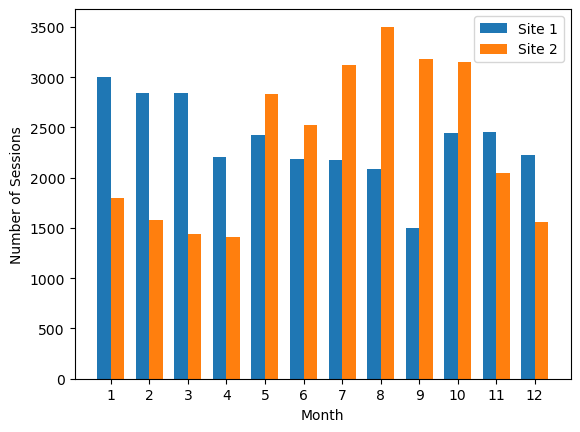

In [29]:
# Plot the sessions per month for each site
fig, ax = plt.subplots()
site_ids = sessions_per_month["siteID"].unique()

bar_width = 0.35
for i, site_id in enumerate(site_ids):
    monthly_data = sessions_per_month[sessions_per_month["siteID"] == site_id]
    ax.bar(monthly_data["month"] + i * bar_width, monthly_data["session_count"], label=f'Site {site_id}', width=bar_width)

# Add labels and legend
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sessions")
ax.set_xticks(sessions_per_month["month"].unique() + (len(site_ids) - 1) * bar_width / 2)
ax.set_xticklabels(sessions_per_month["month"].unique())
ax.legend()

# Show the plot
plt.show()

Note that the number of charging sessions fluctuates more at the second (assumed public) site. A rather far fetched explanation might be that students might be more motivated to go to university in summer, while the employees have to go to work no matter the weather.

Possibly the pandemic also has an impact here since there were fewer lockdowns during summer months, so people were more able to go to university during the summer.